In [1]:
import torch
import torch.nn as nn
import seaborn as sns
# Example input data and target labels
# Replace these tensors with your own data
input_data = torch.randn(32, 10)  # Batch size: 32, Number of classes: 10
target_labels = torch.randint(0, 10, (32,))  # Target labels for the batch

# Create the CrossEntropyLoss criterion
criterion = nn.CrossEntropyLoss()

# Compute the loss
loss = criterion(input_data, target_labels)

print("Cross-Entropy Loss:", loss.item())


Cross-Entropy Loss: 2.6151437759399414


In [2]:

import torch
import torch.nn.functional as F

# Example input data and target labels
# Replace these tensors with your own data
input_probs = torch.randn(32, 10)  # Batch size: 32, Number of classes: 10
target_labels = torch.randint(0, 10, (32,))  # Target labels for the batch

# Compute the loss using functional API
loss = F.cross_entropy(input_probs, target_labels)

print("Cross-Entropy Loss:", loss.item())

Cross-Entropy Loss: 2.7016384601593018


Epoch [1/10], Loss: 0.7754
Epoch [2/10], Loss: 0.7552
Epoch [3/10], Loss: 0.7842
Epoch [4/10], Loss: 0.7421
Epoch [5/10], Loss: 0.8209
Epoch [6/10], Loss: 0.8085
Epoch [7/10], Loss: 0.8958
Epoch [8/10], Loss: 0.6731
Epoch [9/10], Loss: 0.8445
Epoch [10/10], Loss: 0.7526


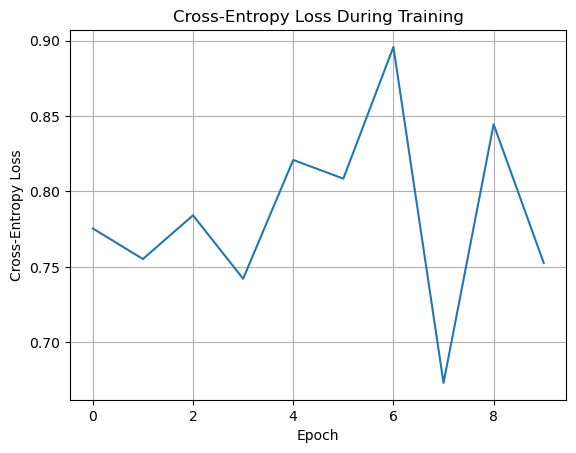

In [3]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Example neural network architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc = nn.Linear(10, 2)  # Input size: 10, Output size: 2

    def forward(self, x):
        return self.fc(x)

# Create the neural network and loss criterion
net = Net()
criterion = nn.CrossEntropyLoss()

# Example training loop
num_epochs = 10
learning_rate = 0.01
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)
losses = []

for epoch in range(num_epochs):
    optimizer.zero_grad()
    inputs = torch.randn(32, 10)  # Replace with your actual data
    labels = torch.randint(0, 2, (32,))  # Replace with your actual labels
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

# Plotting the loss
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Cross-Entropy Loss')
plt.title('Cross-Entropy Loss During Training')
plt.grid(True)
plt.show()


Epoch [100/1000], Loss: 0.6938
Epoch [200/1000], Loss: 0.6934
Epoch [300/1000], Loss: 0.6932
Epoch [400/1000], Loss: 0.6930
Epoch [500/1000], Loss: 0.6929
Epoch [600/1000], Loss: 0.6929
Epoch [700/1000], Loss: 0.6928
Epoch [800/1000], Loss: 0.6928
Epoch [900/1000], Loss: 0.6927
Epoch [1000/1000], Loss: 0.6927


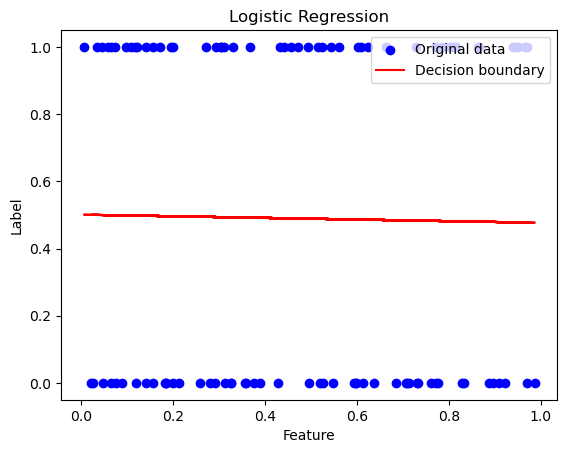

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Generate some toy data
np.random.seed(42)
num_samples = 100
features = np.random.rand(num_samples, 1)
labels = np.random.randint(2, size=num_samples)

# Convert data to PyTorch tensors
X = torch.tensor(features, dtype=torch.float32)
y = torch.tensor(labels, dtype=torch.float32)

# Define the logistic regression model
class LogisticRegression(nn.Module):
    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(1, 1)  # One input feature, one output (binary classification)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))

# Initialize the model
model = LogisticRegression()

# Define the loss function and optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Training loop
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X)
    loss = criterion(outputs, y.view(-1, 1))  # Make y a column vector for the loss function

    # Backpropagation and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Plot the original data and the learned decision boundary
plt.scatter(features, labels, c='blue', label='Original data')
with torch.no_grad():
    decision_boundary = model(X)
    plt.plot(features, decision_boundary.numpy(), c='red', label='Decision boundary')
plt.xlabel('Feature')
plt.ylabel('Label')
plt.title('Logistic Regression')
plt.legend()
plt.show()


Epoch [100/1000], Loss: 0.6927
Epoch [200/1000], Loss: 0.6927
Epoch [300/1000], Loss: 0.6927
Epoch [400/1000], Loss: 0.6927
Epoch [500/1000], Loss: 0.6927
Epoch [600/1000], Loss: 0.6927
Epoch [700/1000], Loss: 0.6927
Epoch [800/1000], Loss: 0.6927
Epoch [900/1000], Loss: 0.6927
Epoch [1000/1000], Loss: 0.6927


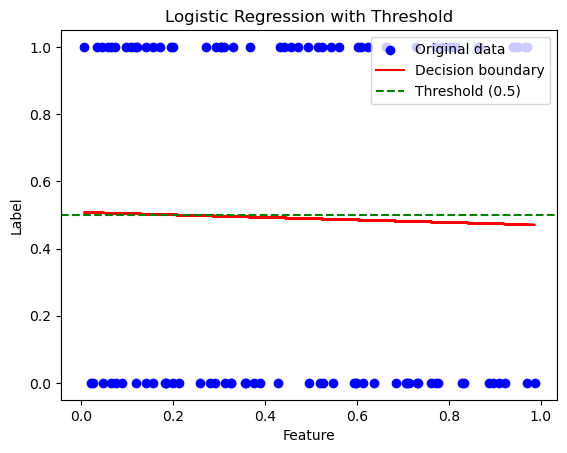

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# ... (data generation and model definition)

# Training loop
num_epochs = 1000
threshold = 0.5  # Adjust this threshold according to your needs
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X)
    predicted_labels = (outputs >= threshold).float()  # Applying threshold
    loss = criterion(outputs, y.view(-1, 1))

    # Backpropagation and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Plot the original data and the learned decision boundary
plt.scatter(features, labels, c='blue', label='Original data')
with torch.no_grad():
    decision_boundary = model(X)
    plt.plot(features, decision_boundary.numpy(), c='red', label='Decision boundary')
plt.axhline(y=threshold, color='green', linestyle='--', label=f'Threshold ({threshold})')
plt.xlabel('Feature')
plt.ylabel('Label')
plt.title('Logistic Regression with Threshold')
plt.legend()
plt.show()


Epoch [100/1000], Loss: 0.6927
Epoch [200/1000], Loss: 0.6927
Epoch [300/1000], Loss: 0.6927
Epoch [400/1000], Loss: 0.6927
Epoch [500/1000], Loss: 0.6927
Epoch [600/1000], Loss: 0.6927
Epoch [700/1000], Loss: 0.6927
Epoch [800/1000], Loss: 0.6927
Epoch [900/1000], Loss: 0.6927
Epoch [1000/1000], Loss: 0.6927


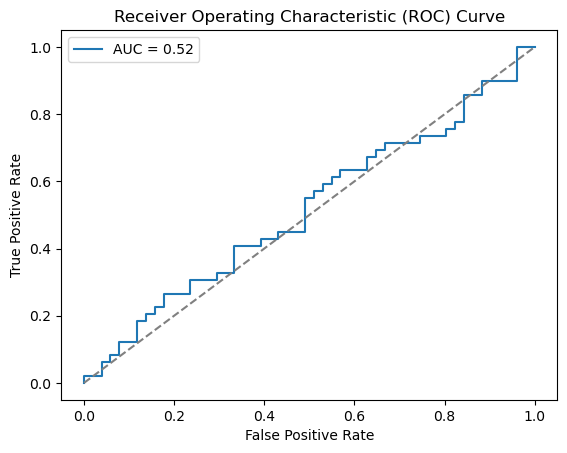

Confusion Matrix:
[[37 14]
 [34 15]]


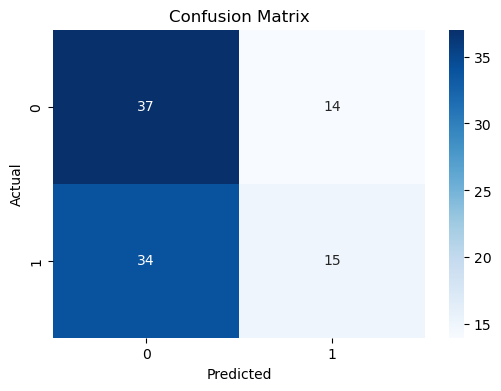

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

# ... (data generation and model definition)

# Training loop
num_epochs = 1000
threshold = 0.5

for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X)
    predicted_labels = (outputs >= threshold).float()  # Applying threshold
    loss = criterion(outputs, y.view(-1, 1))

    # Backpropagation and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Calculate predictions and metrics
with torch.no_grad():
    outputs = model(X)
    predicted_labels = (outputs >= threshold).float()

# Convert tensors to numpy arrays
y_true = y.numpy()
y_pred = predicted_labels.numpy()

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Calculate AUC
auc = roc_auc_score(y_true, outputs.numpy())

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_true, outputs.numpy())
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Display confusion matrix
print("Confusion Matrix:")
print(cm)
# Display formatted confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()







Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



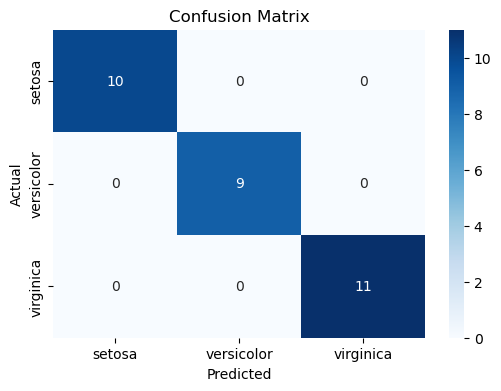

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Iris dataset
data = load_iris()
X = torch.tensor(data.data, dtype=torch.float32)
y = torch.tensor(data.target, dtype=torch.long)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the multi-class classification model
class MultiClassModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super(MultiClassModel, self).__init__()
        self.fc = nn.Linear(input_size, num_classes)

    def forward(self, x):
        return self.fc(x)

input_size = X_train.shape[1]
num_classes = len(data.target_names)
model = MultiClassModel(input_size, num_classes)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Training loop
num_epochs = 1000
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

# Evaluate the model on the test set
with torch.no_grad():
    model.eval()
    test_outputs = model(X_test)
    predicted_labels = test_outputs.argmax(dim=1)
    cm = confusion_matrix(y_test, predicted_labels)
    report = classification_report(y_test, predicted_labels, target_names=data.target_names)

# Display the classification report and confusion matrix
print("Classification Report:\n", report)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



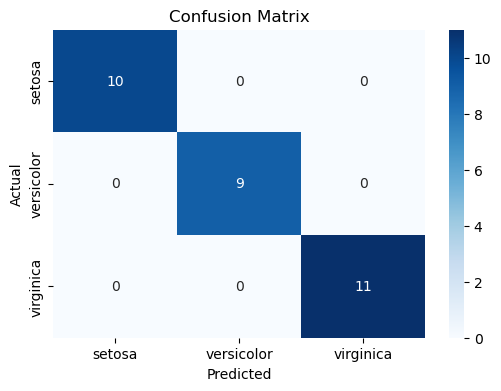

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Iris dataset
data = load_iris()
X = torch.tensor(data.data, dtype=torch.float32)
y = torch.tensor(data.target, dtype=torch.long)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the multi-class classification model with L2 regularization
class MultiClassModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super(MultiClassModel, self).__init__()
        self.fc = nn.Linear(input_size, num_classes)

    def forward(self, x):
        return self.fc(x)

input_size = X_train.shape[1]
num_classes = len(data.target_names)
model = MultiClassModel(input_size, num_classes)

# Define the loss function and optimizer with weight decay
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1, weight_decay=0.01)  # Add weight decay

# Training loop
num_epochs = 1000
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

# Evaluate the model on the test set
with torch.no_grad():
    model.eval()
    test_outputs = model(X_test)
    predicted_labels = test_outputs.argmax(dim=1)
    cm = confusion_matrix(y_test, predicted_labels)
    report = classification_report(y_test, predicted_labels, target_names=data.target_names)

# Display the classification report and confusion matrix
print("Classification Report:\n", report)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      1.00      0.95         9
   virginica       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



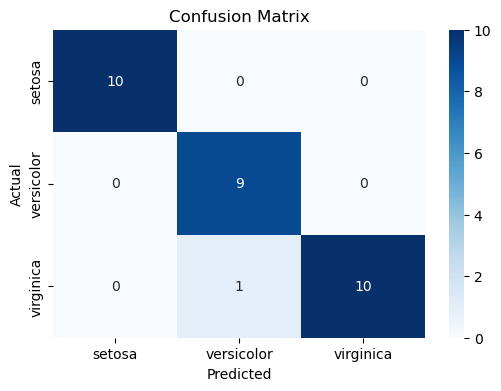

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Iris dataset
data = load_iris()
X = torch.tensor(data.data, dtype=torch.float32)
y = torch.tensor(data.target, dtype=torch.long)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the multi-class classification model with Ridge and Lasso regularization
class MultiClassModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super(MultiClassModel, self).__init__()
        self.fc = nn.Linear(input_size, num_classes)

    def forward(self, x):
        return self.fc(x)

input_size = X_train.shape[1]
num_classes = len(data.target_names)
model = MultiClassModel(input_size, num_classes)

# Define the loss function and optimizer with Ridge and Lasso regularization terms
criterion = nn.CrossEntropyLoss()

# Hyperparameters for regularization
ridge_lambda = 0.01  # Adjust this for Ridge regularization
lasso_lambda = 0.01  # Adjust this for Lasso regularization

optimizer = optim.SGD(model.parameters(), lr=0.1)

# Training loop
num_epochs = 1000
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    
    # Add Ridge and Lasso regularization terms to the loss
    ridge_loss = sum(p.pow(2).sum() for p in model.parameters())
    lasso_loss = sum(p.abs().sum() for p in model.parameters())
    total_loss = loss + ridge_lambda * ridge_loss + lasso_lambda * lasso_loss
    
    total_loss.backward()
    optimizer.step()

# Evaluate the model on the test set
with torch.no_grad():
    model.eval()
    test_outputs = model(X_test)
    predicted_labels = test_outputs.argmax(dim=1)
    cm = confusion_matrix(y_test, predicted_labels)
    report = classification_report(y_test, predicted_labels, target_names=data.target_names)

# Display the classification report and confusion matrix
print("Classification Report:\n", report)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

R-Squared: 1.0
Adjusted R-Squared: 1.0
Mean Absolute Error: 0.0
Root Mean Squared Error: 0.0


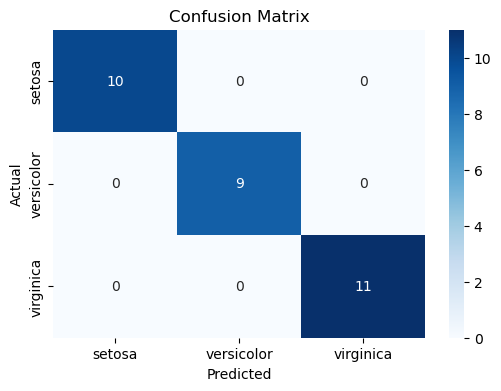

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Iris dataset
data = load_iris()
X = torch.tensor(data.data, dtype=torch.float32)
y = torch.tensor(data.target, dtype=torch.long)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the multi-class classification model with Ridge and Lasso regularization
class MultiClassModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super(MultiClassModel, self).__init__()
        self.fc = nn.Linear(input_size, num_classes)

    def forward(self, x):
        return self.fc(x)

input_size = X_train.shape[1]
num_classes = len(data.target_names)
model = MultiClassModel(input_size, num_classes)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Training loop
num_epochs = 1000
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

# Evaluate the model on the test set
with torch.no_grad():
    model.eval()
    test_outputs = model(X_test)
    predicted_labels = test_outputs.argmax(dim=1)
    cm = confusion_matrix(y_test, predicted_labels)
    report = classification_report(y_test, predicted_labels, target_names=data.target_names)
    
    # Calculate R-Squared, Adjusted R-Squared, MAE, and RMSE
    r_squared = r2_score(y_test, predicted_labels)
    num_samples, num_features = X_test.shape
    adjusted_r_squared = 1 - (1 - r_squared) * (num_samples - 1) / (num_samples - num_features - 1)
    mae = mean_absolute_error(y_test, predicted_labels)
    rmse = mean_squared_error(y_test, predicted_labels, squared=False)

# Display the classification report and confusion matrix
print("Classification Report:\n", report)
print("R-Squared:", r_squared)
print("Adjusted R-Squared:", adjusted_r_squared)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


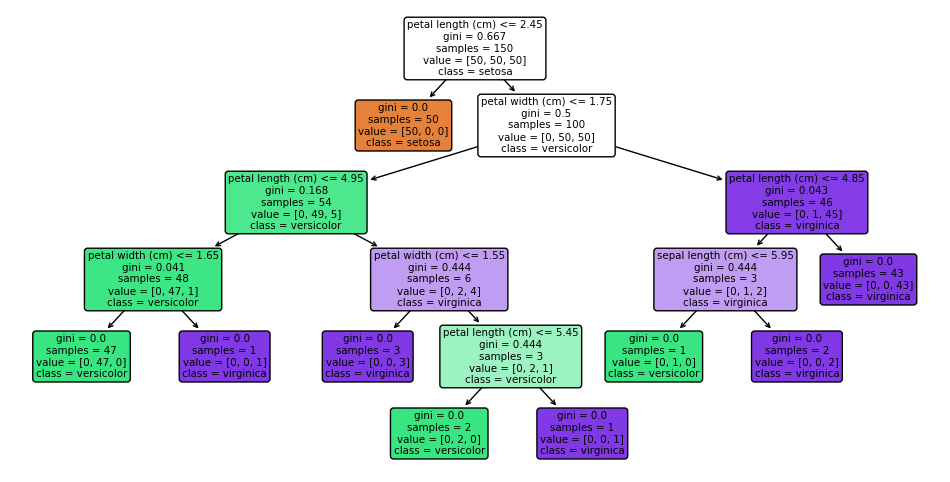

In [13]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Create a decision tree classifier with Gini impurity criterion
clf = DecisionTreeClassifier(criterion='gini', random_state=42)

# Fit the classifier to the data
clf.fit(X, y)

# Plot the decision tree
plt.figure(figsize=(12, 6))
plot_tree(clf, feature_names=data.feature_names, class_names=data.target_names, filled=True, rounded=True)
plt.show()
